In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [5]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [7]:
df.shape

(17000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [10]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [26]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


<Axes: >

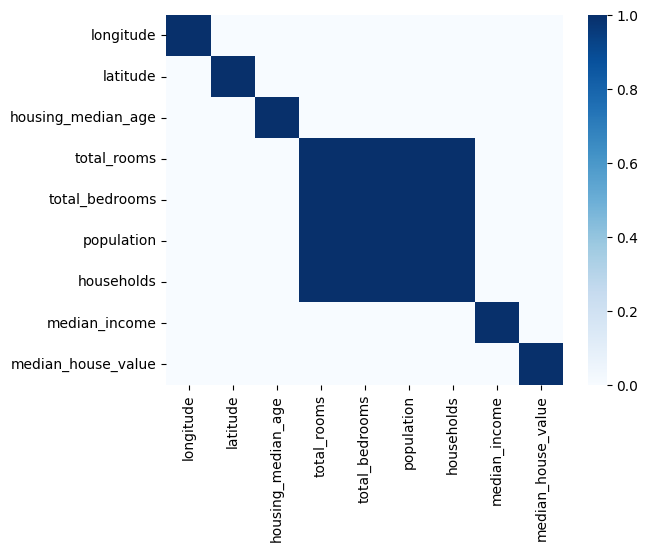

In [23]:
sns.heatmap(df.corr() > 0.8, cmap = "Blues")

<Axes: >

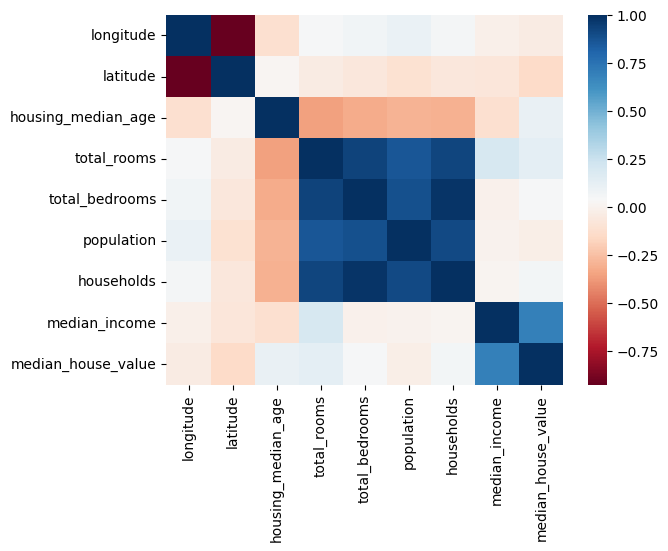

In [27]:
sns.heatmap(df.corr(), cmap = "RdBu")

<Axes: ylabel='median_house_value'>

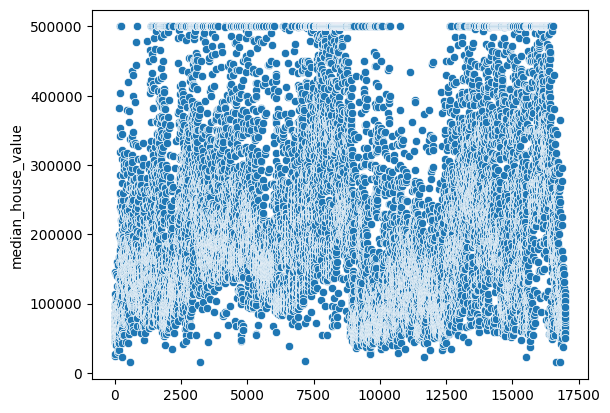

In [29]:
sns.scatterplot(df["median_house_value"])

<Axes: xlabel='median_house_value', ylabel='Count'>

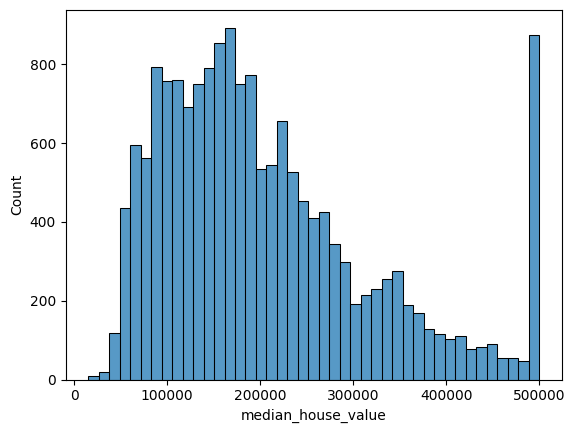

In [31]:
sns.histplot(df["median_house_value"])

In [34]:
X = df.drop(columns = ["median_house_value"])
y = df["median_house_value"]

In [37]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [46]:
len(X_train), len(X_test), len(y_train), len(y_test)

(14450, 2550, 14450, 2550)

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
weak_classifier = DecisionTreeRegressor(max_depth=7)

In [76]:
weak_classifier.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [77]:
print(f"r2 score for Training data :: {r2_score(y_train, weak_classifier.predict(X_train))}")
print(f"r2 score for Test data     :: {r2_score(y_test, weak_classifier.predict(X_test))}")

r2 score for Training data :: 0.713422546340545
r2 score for Test data     :: 0.6548367069222538


In [78]:
print(f"Mean square error for Training data :: {np.sqrt(mean_squared_error(y_train, weak_classifier.predict(X_train)))}")
print(f"Mean square error for Training data :: {np.sqrt(mean_squared_error(y_test, weak_classifier.predict(X_test)))}")

Mean square error for Training data :: 61937.7573622158
Mean square error for Training data :: 69009.10702697402


In [79]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
ensemble = GradientBoostingRegressor(max_depth = 7, n_estimators= 100)

In [85]:
ensemble.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7)

In [86]:
print(f"r2 score for Training data :: {r2_score(y_train, ensemble.predict(X_train))}")
print(f"r2 score for Test data     :: {r2_score(y_test, ensemble.predict(X_test))}")

r2 score for Training data :: 0.9315705863022291
r2 score for Test data     :: 0.8294781470254085


In [87]:
print(f"Mean square error for Training data :: {np.sqrt(mean_squared_error(y_train, ensemble.predict(X_train)))}")
print(f"Mean square error for Training data :: {np.sqrt(mean_squared_error(y_test, ensemble.predict(X_test)))}")

Mean square error for Training data :: 30266.059125505082
Mean square error for Training data :: 48504.73402046454


In [88]:
feature_importances = ensemble.feature_importances_

In [89]:
feature_importances

array([0.15745737, 0.14548378, 0.05832615, 0.01615827, 0.02689831,
       0.03566698, 0.01750198, 0.54250715])

In [90]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [102]:
print("Feature importance::")
for i, j in zip(feature_importances, X.columns):
  print( j,end = "")
  print(int(i*100)*"-")

Feature importance::
longitude---------------
latitude--------------
housing_median_age-----
total_rooms-
total_bedrooms--
population---
households-
median_income------------------------------------------------------
